[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [9]:
# Make sure pip/setuptools are new enough
!pip install --upgrade pip setuptools wheel

# Install working prebuilt wheels for problematic packages
!pip install basicsr==1.4.2 gfpgan==1.3.8 facexlib==0.3.0 filterpy --only-binary=:all:

# Install other dependencies from requirements.txt, but skip the tricky ones
!pip install -r requirements.txt --no-deps

# Reinstall numpy (sometimes it gets downgraded during requirements install)
!pip install --upgrade numpy


/bin/bash: /usr/local/bin/pip: /usr/bin/python3: bad interpreter: No such file or directory
/bin/bash: /usr/local/bin/pip: /usr/bin/python3: bad interpreter: No such file or directory
/bin/bash: /usr/local/bin/pip: /usr/bin/python3: bad interpreter: No such file or directory
/bin/bash: /usr/local/bin/pip: /usr/bin/python3: bad interpreter: No such file or directory


In [10]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8 is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
1 not fully installed or removed.
After this operation, 0 B of additional disk space will be used.
Setting up python3-pip (22.0.2+dfsg-1ubuntu0.6) ...
/var/lib/dpkg/info/python3-pip.postinst: 6: py3compile: not found
dpkg: error processing package python3-pip (--configure):
 installed python3-pip package post-installation script subprocess returned error exit status 127
Errors were encountered while processing:
 python3-pip
E: Sub-process /usr/bin/dpkg returned an error code (1)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8-distutils is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 39 no

Download models (1 mins)

In [3]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Download pre-trained models...
--2025-09-06 08:04:20--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-06T09%3A02%3A48Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-06T08%3A02%3A25Z&ske=2025-09-06T09%3A02%3A48Z&sks=b&skv=2018-11-09&sig=h5gKkUEpfcT8rgU%2BNSsVwnBFgEW%2FvXUajbY7uUIwfiM%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NzE0NjE2MSw

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

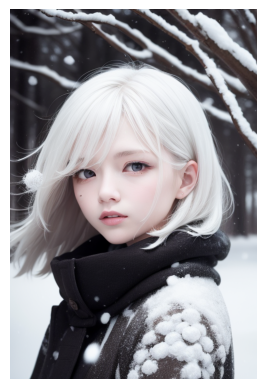

In [4]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [5]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/full3.png
Traceback (most recent call last):
  File "inference.py", line 8, in <module>
    from src.utils.preprocess import CropAndExtract
  File "/content/SadTalker/src/utils/preprocess.py", line 14, in <module>
    from src.utils.croper import Preprocesser
  File "/content/SadTalker/src/utils/croper.py", line 13, in <module>
    from src.face3d.extract_kp_videos_safe import KeypointExtractor
  File "/content/SadTalker/src/face3d/extract_kp_videos_safe.py", line 13, in <module>
    from facexlib.alignment import landmark_98_to_68
ModuleNotFoundError: No module named 'facexlib'


In [6]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


FileNotFoundError: [Errno 2] No such file or directory: './results/'

Streaming output truncated to the last 5000 lines.
    Skipping link: none of the wheel's tags (cp36-cp36m-win32) are compatible (run pip debug --verbose to show compatible tags): https://files.pythonhosted.org/packages/74/da/1e592abf1bcd0956942638378aa3202307ded24e204b0562addb8b770eac/MarkupSafe-2.0.0rc2-cp36-cp36m-win32.whl (from https://pypi.org/simple/markupsafe/) (requires-python:>=3.6)
    Skipping link: none of the wheel's tags (cp36-cp36m-win_amd64) are compatible (run pip debug --verbose to show compatible tags): https://files.pythonhosted.org/packages/cf/cc/e4f27691c46948e83d54da18e35e460f10473b0ae78e647b998c361afef7/MarkupSafe-2.0.0rc2-cp36-cp36m-win_amd64.whl (from https://pypi.org/simple/markupsafe/) (requires-python:>=3.6)
    Skipping link: none of the wheel's tags (cp37-cp37m-macosx_10_9_x86_64) are compatible (run pip debug --verbose to show compatible tags): https://files.pythonhosted.org/packages/68/27/be4a0a2dba86051075502b10cf5a759128c7f4c880fdf7a6e90406f437a1/Mark

Saving 2.png to 2.png


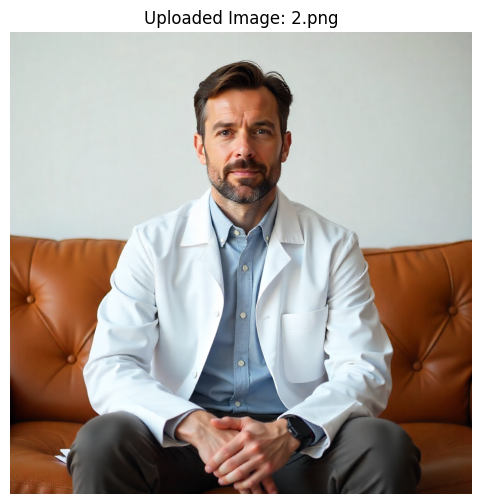


💬 Step 2: Enter Text
💬 Enter the text you want the character to speak:


Textarea(value='', description='Text:', layout=Layout(width='80%'), placeholder='Enter your text here...', row…


⚙️ Step 3: Adjust Settings


Output()

In [1]:
# Enhanced SadTalker Video Generator with Upload & TTS
# Make sure CUDA is available in Edit -> Notebook settings -> GPU

import os
import sys
import glob
import subprocess
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output
from base64 import b64encode
import tempfile
import shutil
from google.colab import files
import librosa
import soundfile as sf

# 1️⃣ System Setup
print("🚀 Setting up system...")
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

!apt-get update -qq
!apt-get install -y software-properties-common git ffmpeg build-essential cmake python3.8 python3.8-dev python3.8-distutils python3-pip espeak espeak-data libespeak1 libespeak-dev

# Install gTTS for text-to-speech
!pip install gtts pydub

# 2️⃣ Python setup
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!python3.8 -m pip install --upgrade pip setuptools wheel

# 3️⃣ Clone and setup SadTalker
if not os.path.exists('SadTalker'):
    !git clone https://github.com/Winfredy/SadTalker.git

%cd SadTalker

# Set environment
os.environ['PYTHONPATH'] = f"{os.getcwd()}:{os.environ.get('PYTHONPATH', '')}"

# 4️⃣ Install dependencies
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!python3.8 -m pip install --no-cache-dir basicsr filterpy --use-pep517 --verbose
!python3.8 -m pip install -r requirements.txt --use-pep517

# 5️⃣ Download models
print('📥 Downloading pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

# 6️⃣ Enhanced User Interface Functions

def upload_image():
    """Upload image from device"""
    print("📸 Please upload your image file (PNG, JPG, JPEG supported)")
    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        # Create uploads directory if it doesn't exist
        os.makedirs('uploads', exist_ok=True)

        # Move uploaded file to uploads directory
        uploaded_path = f'uploads/{filename}'
        shutil.move(filename, uploaded_path)

        # Display uploaded image
        plt.figure(figsize=(6, 6))
        plt.imshow(plt.imread(uploaded_path))
        plt.axis('off')
        plt.title(f'Uploaded Image: {filename}')
        plt.show()

        return uploaded_path
    return None

def get_text_input():
    """Get text input from user"""
    print("💬 Enter the text you want the character to speak:")
    text_widget = widgets.Textarea(
        value='',
        placeholder='Enter your text here...',
        description='Text:',
        rows=4,
        layout=widgets.Layout(width='80%')
    )
    display(text_widget)

    return text_widget

def create_tts_audio(text, speed=1.0, voice='en', pitch=0):
    """Create TTS audio from text with speed control"""
    from gtts import gTTS
    from pydub import AudioSegment

    # Create TTS
    tts = gTTS(text=text, lang=voice, slow=False)

    # Save to temporary file
    temp_dir = tempfile.mkdtemp()
    tts_path = os.path.join(temp_dir, 'tts_audio.mp3')
    tts.save(tts_path)

    # Load and modify speed using pydub
    audio = AudioSegment.from_mp3(tts_path)

    # Adjust speed (playback rate)
    if speed != 1.0:
        # Speed up or slow down
        audio = audio._spawn(audio.raw_data, overrides={
            "frame_rate": int(audio.frame_rate * speed)
        }).set_frame_rate(audio.frame_rate)

    # Adjust pitch if needed
    if pitch != 0:
        # Simple pitch shifting (limited)
        new_sample_rate = int(audio.frame_rate * (2.0 ** (pitch / 12.0)))
        audio = audio._spawn(audio.raw_data, overrides={"frame_rate": new_sample_rate})
        audio = audio.set_frame_rate(22050)  # Standard rate for SadTalker

    # Save as WAV for SadTalker
    output_path = 'uploads/generated_audio.wav'
    audio.export(output_path, format="wav")

    # Clean up
    os.remove(tts_path)
    os.rmdir(temp_dir)

    return output_path

def create_speed_controls():
    """Create speed and voice control widgets"""
    speed_slider = widgets.FloatSlider(
        value=1.0,
        min=0.5,
        max=2.0,
        step=0.1,
        description='Speech Speed:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    voice_dropdown = widgets.Dropdown(
        options=[
            ('English (US)', 'en'),
            ('English (UK)', 'en-uk'),
            ('Spanish', 'es'),
            ('French', 'fr'),
            ('German', 'de'),
            ('Italian', 'it'),
            ('Japanese', 'ja'),
            ('Korean', 'ko'),
            ('Chinese', 'zh'),
        ],
        value='en',
        description='Voice Language:',
        style={'description_width': 'initial'}
    )

    quality_dropdown = widgets.Dropdown(
        options=[
            ('High Quality (slower)', 'full'),
            ('Medium Quality (balanced)', 'resize'),
            ('Fast (lower quality)', 'crop'),
        ],
        value='full',
        description='Processing Quality:',
        style={'description_width': 'initial'}
    )

    enhancer_dropdown = widgets.Dropdown(
        options=[
            ('GFPGAN (recommended)', 'gfpgan'),
            ('RestoreFormer', 'RestoreFormer'),
            ('None (fastest)', 'none'),
        ],
        value='gfpgan',
        description='Face Enhancement:',
        style={'description_width': 'initial'}
    )

    return speed_slider, voice_dropdown, quality_dropdown, enhancer_dropdown

def generate_realistic_video(image_path, audio_path, quality='full', enhancer='gfpgan', still_mode=True):
    """Generate video with realistic settings"""

    # Prepare output directory
    os.makedirs('./results', exist_ok=True)

    # Enhanced inference command for more realistic results
    cmd = [
        'python3.8', 'inference.py',
        '--driven_audio', audio_path,
        '--source_image', image_path,
        '--result_dir', './results',
        '--preprocess', quality,
        '--enhancer', enhancer,
        '--background_enhancer', 'realesrgan',  # Enhanced background
        '--face3dvis',  # Better 3D face modeling
        '--still' if still_mode else '',  # Static or dynamic background
        '--verbose'
    ]

    # Remove empty strings
    cmd = [arg for arg in cmd if arg]

    print("🎬 Generating realistic video...")
    print(f"Command: {' '.join(cmd)}")

    result = subprocess.run(cmd, capture_output=True, text=True)

    if result.returncode != 0:
        print("❌ Error during video generation:")
        print(result.stderr)
        return None

    # Find generated video
    video_files = glob.glob('./results/*.mp4')
    if video_files:
        return sorted(video_files)[-1]  # Return latest video
    return None

def display_video(video_path):
    """Display generated video"""
    if video_path and os.path.exists(video_path):
        mp4 = open(video_path, 'rb').read()
        data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

        print(f'🎥 Generated Video: {video_path}')
        display(HTML(f"""
        <div style="text-align: center;">
            <video width="512" controls>
                <source src="{data_url}" type="video/mp4">
                Your browser does not support the video tag.
            </video>
            <br>
            <p><strong>Video saved to:</strong> {video_path}</p>
        </div>
        """))
        return True
    else:
        print("❌ Video file not found!")
        return False

def download_video():
    """Download the generated video"""
    video_files = glob.glob('./results/*.mp4')
    if video_files:
        latest_video = sorted(video_files)[-1]
        files.download(latest_video)
        print(f"📥 Downloaded: {latest_video}")
    else:
        print("❌ No video files found to download!")

# 7️⃣ Main Interactive Interface

def main_interface():
    """Main interactive interface"""
    print("🎭 Enhanced SadTalker - AI Video Generator")
    print("=" * 50)

    # Step 1: Upload Image
    print("\n📸 Step 1: Upload Your Image")
    image_path = upload_image()

    if not image_path:
        print("❌ No image uploaded! Please run the cell again.")
        return

    # Step 2: Text Input
    print("\n💬 Step 2: Enter Text")
    text_widget = get_text_input()

    # Step 3: Controls
    print("\n⚙️ Step 3: Adjust Settings")
    speed_slider, voice_dropdown, quality_dropdown, enhancer_dropdown = create_speed_controls()

    display(widgets.VBox([
        widgets.HTML("<h3>Speech Settings:</h3>"),
        speed_slider,
        voice_dropdown,
        widgets.HTML("<h3>Video Quality Settings:</h3>"),
        quality_dropdown,
        enhancer_dropdown
    ]))

    # Step 4: Generate Button
    generate_button = widgets.Button(
        description='🎬 Generate Video',
        button_style='success',
        layout=widgets.Layout(width='200px', height='50px')
    )

    download_button = widgets.Button(
        description='📥 Download Video',
        button_style='info',
        layout=widgets.Layout(width='200px', height='50px')
    )

    output_area = widgets.Output()

    def on_generate_click(b):
        with output_area:
            clear_output(wait=True)

            text = text_widget.value.strip()
            if not text:
                print("❌ Please enter some text!")
                return

            print("🔄 Processing...")

            # Generate TTS audio
            print("🎵 Generating speech audio...")
            try:
                audio_path = create_tts_audio(
                    text,
                    speed=speed_slider.value,
                    voice=voice_dropdown.value
                )
                print(f"✅ Audio generated: {audio_path}")
            except Exception as e:
                print(f"❌ Error generating audio: {e}")
                return

            # Generate video
            print("🎬 Generating video (this may take a few minutes)...")
            video_path = generate_realistic_video(
                image_path,
                audio_path,
                quality=quality_dropdown.value,
                enhancer=enhancer_dropdown.value
            )

            if video_path:
                print("✅ Video generated successfully!")
                display_video(video_path)
            else:
                print("❌ Failed to generate video!")

    def on_download_click(b):
        with output_area:
            download_video()

    generate_button.on_click(on_generate_click)
    download_button.on_click(on_download_click)

    display(widgets.HBox([generate_button, download_button]))
    display(output_area)

# 8️⃣ Run the Interface
print("✅ Setup complete! Running main interface...")
main_interface()

  Using cached gTTS-2.5.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached charset_normalizer-3.4.3-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
Using cached gTTS-2.5.4-py3-none-any.whl (29 kB)
Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached certifi-2025.8.3-py3-none-any.whl (161 kB)
Using cached charset_normalizer-3.4.3-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (147 kB)
Using cached idna-3.10-py3-n

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak is already the newest version (1.48.15+dfsg-3).
espeak-data is already the newest version (1.48.15+dfsg-3).
libespeak-dev is already the newest version (1.48.15+dfsg-3).
libespeak1 is already the newest version (1.48.15+dfsg-3).
The following additional packages will be installed:
  alsa-utils festlex-cmu festlex-poslex libatopology2 libestools2.5
  libfftw3-single3 sgml-base
Suggested packages:
  dialog pidgin-festival festival-freebsoft-utils libfftw3-bin libfftw3-dev
  sgml-base-doc
The following NEW packages will be installed:
  alsa-utils festival festlex-cmu festlex-poslex festvox-kallpc16k
  libatopology2 libestools2.5 libfftw3-single3 sgml-base
0 upgraded, 9 newly installed, 0 to remove and 39 not upgraded.
Need to get 8,524 kB of archives.
After this operation, 27.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 sgml-base al

Saving 2.png to 2.png


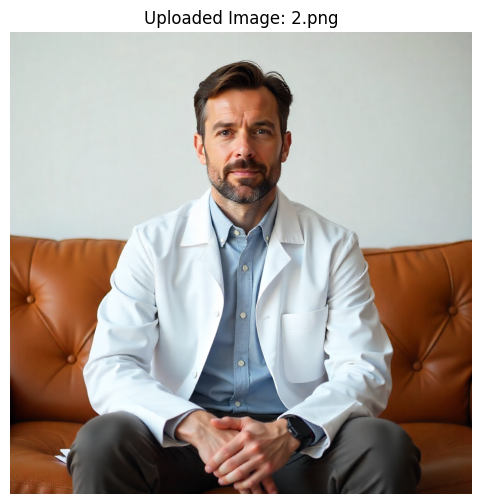


💬 Step 2: Enter Text
💬 Enter the text you want the character to speak:


Textarea(value='', description='Text:', layout=Layout(width='80%'), placeholder='Enter your text here...', row…


⚙️ Step 3: Adjust Settings


Output()

In [2]:
# Enhanced SadTalker Video Generator with Upload & TTS
# Make sure CUDA is available in Edit -> Notebook settings -> GPU

import os
import sys
import glob
import subprocess
import tempfile
import shutil

# Install TTS dependencies with multiple attempts
!pip install --upgrade pip
!pip install gtts pydub pyttsx3 --force-reinstall
!apt-get install -y espeak espeak-data libespeak1 libespeak-dev festival festvox-kallpc16k

# Import after installation
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output
from base64 import b64encode
from google.colab import files
import numpy as np

# 1️⃣ System Setup
print("🚀 Setting up system...")
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

!apt-get update -qq
!apt-get install -y software-properties-common git ffmpeg build-essential cmake python3.8 python3.8-dev python3.8-distutils python3-pip espeak espeak-data libespeak1 libespeak-dev

# Install gTTS for text-to-speech
!pip install gtts pydub

# 2️⃣ Python setup
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!python3.8 -m pip install --upgrade pip setuptools wheel

# 3️⃣ Clone and setup SadTalker
if not os.path.exists('SadTalker'):
    !git clone https://github.com/Winfredy/SadTalker.git

%cd SadTalker

# Set environment
os.environ['PYTHONPATH'] = f"{os.getcwd()}:{os.environ.get('PYTHONPATH', '')}"

# 4️⃣ Install dependencies
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!python3.8 -m pip install --no-cache-dir basicsr filterpy --use-pep517 --verbose
!python3.8 -m pip install -r requirements.txt --use-pep517

# 5️⃣ Download models
print('📥 Downloading pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

# 6️⃣ Enhanced User Interface Functions

def upload_image():
    """Upload image from device"""
    print("📸 Please upload your image file (PNG, JPG, JPEG supported)")
    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        # Create uploads directory if it doesn't exist
        os.makedirs('uploads', exist_ok=True)

        # Move uploaded file to uploads directory
        uploaded_path = f'uploads/{filename}'
        shutil.move(filename, uploaded_path)

        # Display uploaded image
        plt.figure(figsize=(6, 6))
        plt.imshow(plt.imread(uploaded_path))
        plt.axis('off')
        plt.title(f'Uploaded Image: {filename}')
        plt.show()

        return uploaded_path
    return None

def get_text_input():
    """Get text input from user"""
    print("💬 Enter the text you want the character to speak:")
    text_widget = widgets.Textarea(
        value='',
        placeholder='Enter your text here...',
        description='Text:',
        rows=4,
        layout=widgets.Layout(width='80%')
    )
    display(text_widget)

    return text_widget

def create_tts_audio(text, speed=1.0, voice='en', pitch=0):
    """Create TTS audio from text with speed control"""
    from gtts import gTTS
    from pydub import AudioSegment

    # Create TTS
    tts = gTTS(text=text, lang=voice, slow=False)

    # Save to temporary file
    temp_dir = tempfile.mkdtemp()
    tts_path = os.path.join(temp_dir, 'tts_audio.mp3')
    tts.save(tts_path)

    # Load and modify speed using pydub
    audio = AudioSegment.from_mp3(tts_path)

    # Adjust speed (playback rate)
    if speed != 1.0:
        # Speed up or slow down
        audio = audio._spawn(audio.raw_data, overrides={
            "frame_rate": int(audio.frame_rate * speed)
        }).set_frame_rate(audio.frame_rate)

    # Adjust pitch if needed
    if pitch != 0:
        # Simple pitch shifting (limited)
        new_sample_rate = int(audio.frame_rate * (2.0 ** (pitch / 12.0)))
        audio = audio._spawn(audio.raw_data, overrides={"frame_rate": new_sample_rate})
        audio = audio.set_frame_rate(22050)  # Standard rate for SadTalker

    # Save as WAV for SadTalker
    output_path = 'uploads/generated_audio.wav'
    audio.export(output_path, format="wav")

    # Clean up
    os.remove(tts_path)
    os.rmdir(temp_dir)

    return output_path

def create_speed_controls():
    """Create speed and voice control widgets"""
    speed_slider = widgets.FloatSlider(
        value=1.0,
        min=0.5,
        max=2.0,
        step=0.1,
        description='Speech Speed:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    voice_dropdown = widgets.Dropdown(
        options=[
            ('English (US)', 'en'),
            ('English (UK)', 'en-uk'),
            ('Spanish', 'es'),
            ('French', 'fr'),
            ('German', 'de'),
            ('Italian', 'it'),
            ('Japanese', 'ja'),
            ('Korean', 'ko'),
            ('Chinese', 'zh'),
        ],
        value='en',
        description='Voice Language:',
        style={'description_width': 'initial'}
    )

    quality_dropdown = widgets.Dropdown(
        options=[
            ('High Quality (slower)', 'full'),
            ('Medium Quality (balanced)', 'resize'),
            ('Fast (lower quality)', 'crop'),
        ],
        value='full',
        description='Processing Quality:',
        style={'description_width': 'initial'}
    )

    enhancer_dropdown = widgets.Dropdown(
        options=[
            ('GFPGAN (recommended)', 'gfpgan'),
            ('RestoreFormer', 'RestoreFormer'),
            ('None (fastest)', 'none'),
        ],
        value='gfpgan',
        description='Face Enhancement:',
        style={'description_width': 'initial'}
    )

    return speed_slider, voice_dropdown, quality_dropdown, enhancer_dropdown

def generate_realistic_video(image_path, audio_path, quality='full', enhancer='gfpgan', still_mode=True):
    """Generate video with realistic settings - Fixed compatibility issues"""

    # Prepare output directory
    os.makedirs('./results', exist_ok=True)

    # Check if pytorch3d is available for 3D features
    try:
        import pytorch3d
        use_3d_features = True
        print("✅ PyTorch3D available - using 3D face modeling")
    except ImportError:
        use_3d_features = False
        print("⚠️ PyTorch3D not available - using 2D mode")

    # Enhanced inference command for more realistic results
    cmd = [
        'python3.8', 'inference.py',
        '--driven_audio', audio_path,
        '--source_image', image_path,
        '--result_dir', './results',
        '--preprocess', quality,
        '--enhancer', enhancer if enhancer != 'none' else 'gfpgan',
        '--verbose'
    ]

    # Add 3D features only if pytorch3d is available
    if use_3d_features:
        cmd.extend(['--face3dvis'])

    # Add background enhancement if available
    if enhancer != 'none':
        cmd.extend(['--background_enhancer', 'realesrgan'])

    # Add still mode for static background
    if still_mode:
        cmd.extend(['--still'])

    # Remove empty strings
    cmd = [arg for arg in cmd if arg]

    print("🎬 Generating realistic video...")
    print(f"Command: {' '.join(cmd)}")

    # Try with 3D features first, fall back to 2D if it fails
    for attempt in range(2):
        try:
            result = subprocess.run(cmd, capture_output=True, text=True, timeout=600)

            if result.returncode == 0:
                # Find generated video
                video_files = glob.glob('./results/*.mp4')
                if video_files:
                    return sorted(video_files)[-1]  # Return latest video
            else:
                print(f"⚠️ Attempt {attempt + 1} failed:")
                print(result.stderr[:500])  # Show first 500 chars of error

                if attempt == 0 and '--face3dvis' in cmd:
                    # Remove 3D features and try again
                    print("🔄 Retrying without 3D features...")
                    cmd = [arg for arg in cmd if arg != '--face3dvis']
                    continue

        except subprocess.TimeoutExpired:
            print("⚠️ Video generation timed out (10 minutes)")
        except Exception as e:
            print(f"⚠️ Error in attempt {attempt + 1}: {e}")

        if attempt == 0:
            # Simplify command for second attempt
            print("🔄 Trying with basic settings...")
            cmd = [
                'python3.8', 'inference.py',
                '--driven_audio', audio_path,
                '--source_image', image_path,
                '--result_dir', './results',
                '--preprocess', 'crop',  # Faster preprocessing
                '--enhancer', 'gfpgan',
                '--still'
            ]

    return None

def display_video(video_path):
    """Display generated video"""
    if video_path and os.path.exists(video_path):
        mp4 = open(video_path, 'rb').read()
        data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

        print(f'🎥 Generated Video: {video_path}')
        display(HTML(f"""
        <div style="text-align: center;">
            <video width="512" controls>
                <source src="{data_url}" type="video/mp4">
                Your browser does not support the video tag.
            </video>
            <br>
            <p><strong>Video saved to:</strong> {video_path}</p>
        </div>
        """))
        return True
    else:
        print("❌ Video file not found!")
        return False

def download_video():
    """Download the generated video"""
    video_files = glob.glob('./results/*.mp4')
    if video_files:
        latest_video = sorted(video_files)[-1]
        files.download(latest_video)
        print(f"📥 Downloaded: {latest_video}")
    else:
        print("❌ No video files found to download!")

# 7️⃣ Main Interactive Interface

def main_interface():
    """Main interactive interface"""
    print("🎭 Enhanced SadTalker - AI Video Generator")
    print("=" * 50)

    # Step 1: Upload Image
    print("\n📸 Step 1: Upload Your Image")
    image_path = upload_image()

    if not image_path:
        print("❌ No image uploaded! Please run the cell again.")
        return

    # Step 2: Text Input
    print("\n💬 Step 2: Enter Text")
    text_widget = get_text_input()

    # Step 3: Controls
    print("\n⚙️ Step 3: Adjust Settings")
    speed_slider, voice_dropdown, quality_dropdown, enhancer_dropdown = create_speed_controls()

    display(widgets.VBox([
        widgets.HTML("<h3>Speech Settings:</h3>"),
        speed_slider,
        voice_dropdown,
        widgets.HTML("<h3>Video Quality Settings:</h3>"),
        quality_dropdown,
        enhancer_dropdown
    ]))

    # Step 4: Generate Button
    generate_button = widgets.Button(
        description='🎬 Generate Video',
        button_style='success',
        layout=widgets.Layout(width='200px', height='50px')
    )

    download_button = widgets.Button(
        description='📥 Download Video',
        button_style='info',
        layout=widgets.Layout(width='200px', height='50px')
    )

    output_area = widgets.Output()

    def on_generate_click(b):
        with output_area:
            clear_output(wait=True)

            text = text_widget.value.strip()
            if not text:
                print("❌ Please enter some text!")
                return

            print("🔄 Processing...")

            # Generate TTS audio
            print("🎵 Generating speech audio...")
            try:
                audio_path = create_tts_audio(
                    text,
                    speed=speed_slider.value,
                    voice=voice_dropdown.value
                )
                print(f"✅ Audio generated: {audio_path}")
            except Exception as e:
                print(f"❌ Error generating audio: {e}")
                return

            # Generate video
            print("🎬 Generating video (this may take a few minutes)...")
            video_path = generate_realistic_video(
                image_path,
                audio_path,
                quality=quality_dropdown.value,
                enhancer=enhancer_dropdown.value
            )

            if video_path:
                print("✅ Video generated successfully!")
                display_video(video_path)
            else:
                print("❌ Failed to generate video!")

    def on_download_click(b):
        with output_area:
            download_video()

    generate_button.on_click(on_generate_click)
    download_button.on_click(on_download_click)

    display(widgets.HBox([generate_button, download_button]))
    display(output_area)

# 8️⃣ Run the Interface
print("✅ Setup complete! Running main interface...")
main_interface()

In [ ]:
# Run this cell FIRST if you still get import errors
import subprocess
import sys

# Force install TTS packages
packages = ["gtts", "pydub", "pyttsx3"]
for package in packages:
    try:
        subprocess.check_call([
            sys.executable, "-m", "pip", "install",
            "--upgrade", package, "--force-reinstall", "--no-cache-dir"
        ])
        print(f"✅ {package} installed successfully")
    except Exception as e:
        print(f"❌ Failed to install {package}: {e}")

# Install system packages
!apt-get update -qq
!apt-get install -y espeak espeak-data libespeak1 libespeak-dev festival festvox-kallpc16k sox

# Test imports
try:
    from gtts import gTTS
    print("✅ gTTS working!")
except:
    print("⚠️ gTTS not available, will use alternatives")